In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import numpy as np
import torch
import scipy.io as sio
import os

In [3]:
def getData(path):
    mat_list = os.listdir(path)
    mat_list.sort()
    temp_list = []
    for name in mat_list[:]:
        mat_path = os.path.join(path, name)
        data = sio.loadmat(mat_path, squeeze_me=True, struct_as_record=False)['data']
        temp_list.append(data)
    return temp_list

In [4]:
data0, data1 = getData("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/Progetto/Risultati/RoomPartition/")

In [5]:
print('name:', data0.name)
print('gt_rTypes:', data0.gt_rTypes)
print('gt_rBoxes:', data0.gt_rBoxes)
print('Boundary:', data0.Boundary)
print('rTypes:', data0.rTypes)
print('rBoxes:',data0.rBoxes)
print('rCenters:',data0.rCenters)


name: 0
gt_rTypes: [0 1 2 3 7 9]
gt_rBoxes: [[ 14  55 101  92]
 [ 80  36 110  62]
 [ 26  57  41  72]
 [ 65  36  78  53]
 [ 43  36  63  62]
 [103  64 114  92]]
Boundary: [[ 19  82   1   1]
 [ 27  82   1   1]
 [ 43  82   0   0]
 [ 43  92   1   0]
 [114  92   2   0]
 [114  64   3   0]
 [110  64   2   0]
 [110  36   3   0]
 [ 43  36   0   0]
 [ 43  57   3   0]
 [ 26  57   0   0]
 [ 26  74   3   0]
 [ 14  74   0   0]
 [ 14  82   1   0]]
rTypes: [0 1 2 3 7 9]
rBoxes: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
rCenters: [[ 58  71]
 [ 93  48]
 [ 33  65]
 [ 72  43]
 [ 53  47]
 [108  78]]


In [17]:
print('name:', data1.name)
print('gt_rTypes:', data1.gt_rTypes)
print('gt_rBoxes:', data1.gt_rBoxes)
print('Boundary:', data1.Boundary)
print('rTypes:', data1.rTypes)
print('rBoxes:',data1.rBoxes)
print('rCenters:',data1.rCenters)


name: 1
gt_rTypes: [0 1 2 3 5 7 9]
gt_rBoxes: [[ 28  22  65 106]
 [ 67  72  97 106]
 [ 25  22  42  36]
 [ 28  38  36  50]
 [ 67  52  97  70]
 [ 67  22  97  50]
 [ 99  72 103 106]]
Boundary: [[ 59 101   0   1]
 [ 59 106   1   0]
 [103 106   2   0]
 [103  72   3   0]
 [ 97  72   2   0]
 [ 97  22   3   0]
 [ 25  22   0   0]
 [ 25  36   1   0]
 [ 28  36   0   0]
 [ 28 100   1   0]
 [ 59 100   0   0]]
rTypes: [0 1 2 3 7 7]
rBoxes: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
rCenters: [[64 69]
 [79 33]
 [40 69]
 [36 52]
 [81 59]
 [39 32]]


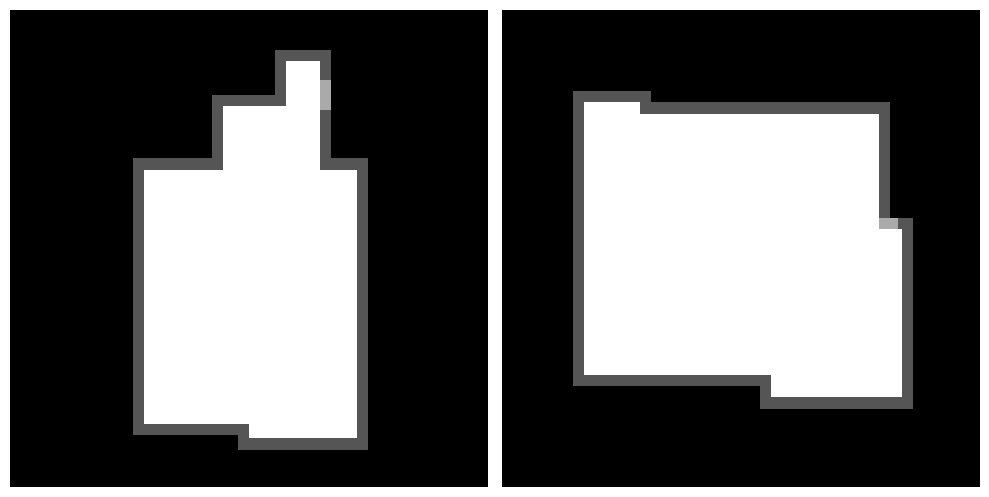

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_path_0 = '/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/Progetto/Input/mat0.png'
image_path_1 = '/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/Progetto/Input/mat1.png'


img0 = mpimg.imread(image_path_0)
img1 = mpimg.imread(image_path_1)


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img0, cmap='gray')
axes[1].imshow(img1, cmap='gray')


for ax in axes:
    ax.grid(False)
    ax.axis('off')


plt.tight_layout()
plt.show()


In [7]:
room_label = [(0, 'LivingRoom'),
              (1, 'MasterRoom'),
              (2, 'Kitchen'),
              (3, 'Bathroom'),
              (4, 'DiningRoom'),
              (5, 'ChildRoom'),
              (6, 'StudyRoom'),
              (7, 'SecondRoom'),
              (8, 'GuestRoom'),
              (9, 'Balcony'),
              (10, 'Entrance'),
              (11, 'Storage'),
              (12, 'Wall-in'),
              (13, 'External'),
              (14, 'ExteriorWall'),
              (15, 'FrontDoor'),
              (16, 'Interior')]

rTypes = data0.rTypes
rCenter = data0.rCenters

In [8]:
len(rTypes)

6

[0 1 2 3 7 9]
[0 1 2 3 7 9]


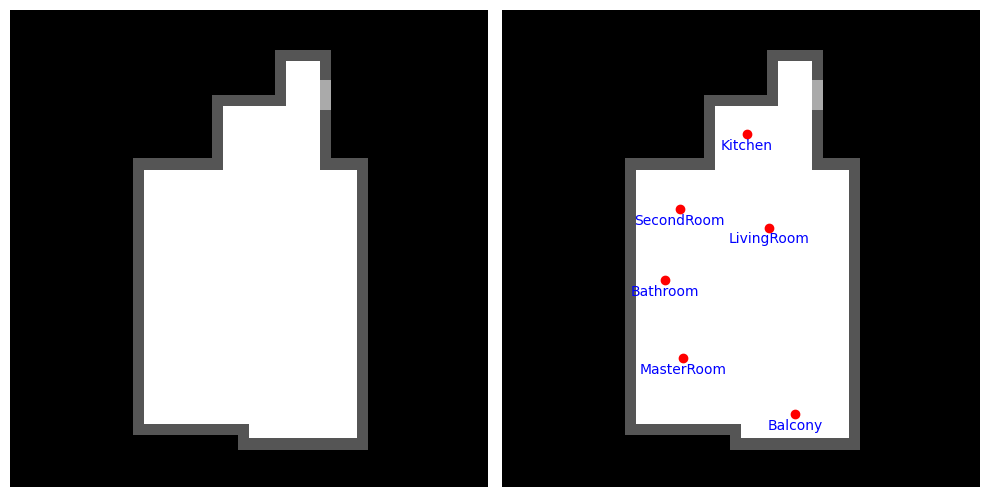

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

rTypes = data0.rTypes
print(data0.gt_rTypes)
print(rTypes)
rCenter = data0.rCenters

# Prima figura
ax = axes[0]
ax.imshow(img0, cmap='gray')
ax.grid("off")
ax.axis('off')


# Seconda figura
ax = axes[1]
ax.imshow(img0, cmap='gray')
ax.grid("off")
ax.axis('off')
for j in range(len(rTypes)):
  ax.scatter(rCenter[j][1], rCenter[j][0], color='red', marker='o')
  ax.text(rCenter[j][1], rCenter[j][0] + 3, room_label[rTypes[j]][1], color='blue', ha='center', va='center')

# Regolare il layout
plt.tight_layout()
plt.show()

[0 1 2 3 5 7 9]
[0 1 2 3 7 7]


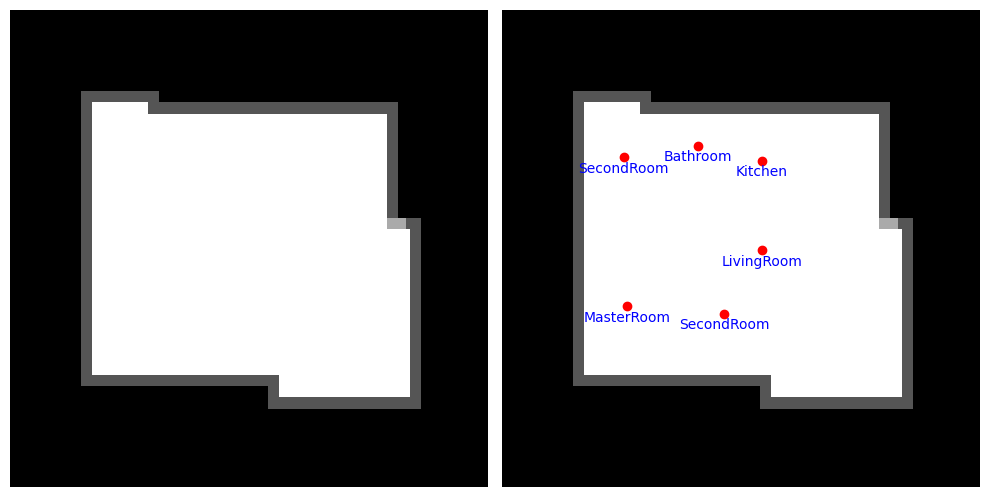

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
rTypes = data1.rTypes
print(data1.gt_rTypes)
print(rTypes)
rCenter = data1.rCenters
# Prima figura
ax = axes[0]
ax.imshow(img1, cmap='gray')
ax.grid("off")
ax.axis('off')


# Seconda figura
ax = axes[1]
ax.imshow(img1, cmap='gray')
ax.grid("off")
ax.axis('off')
for j in range(len(rTypes)):
    ax.scatter(rCenter[j][1], rCenter[j][0], color='red', marker='o')
    ax.text(rCenter[j][1], rCenter[j][0] + 3, room_label[rTypes[j]][1], color='blue', ha='center', va='center')

# Regolare il layout
plt.tight_layout()
plt.show()